### Predictive Analysis of Attrition Rates

In [3]:
## Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Check versions
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', np.__version__)

pandas version: 1.4.2
numpy version: 1.21.5
seaborn version: 1.21.5


In [4]:
## Load the scrubbed DF from Project Milestone 1
df = pd.read_csv('DSC550_DF_Milestone_2.csv')

## Display DF
df.head()

,Unnamed: 0,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,...,11,0,1,6,1,0,0,3,4,2
1,1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,...,23,1,6,3,5,1,4,3,2,4
2,2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,...,15,3,5,2,5,0,3,2,2,1
3,3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,...,11,3,13,5,8,7,5,4,4,3
4,4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,...,12,2,9,2,6,0,4,4,1,3


In [5]:
## drop columns from exporting to CSV
df.drop('Unnamed: 0', axis=1, inplace=True)

## drop column from milestone 2 feedback
df.drop('EmployeeID', axis=1, inplace=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4,4,1,3


In [6]:
df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
WorkLifeBalance             int64
dtype: object

In [7]:
## dummy variables step from milestone 2
dummy_variables = pd.get_dummies(df[['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']], drop_first=True)

In [8]:
dummy_variables.head()

,DistanceFromHome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,17,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,2,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,10,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [9]:
df2 = pd.concat([df, dummy_variables], axis = 1)
df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DistanceFromHome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,0,1,6,1,0,0,3,4,2,6,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,1,6,3,5,1,4,3,2,4,10,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,3,5,2,5,0,3,2,2,1,17,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,11,3,13,5,8,7,5,4,4,3,2,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,12,2,9,2,6,0,4,4,1,3,10,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [10]:
## drop dummy columns
df2.drop('BusinessTravel', axis=1, inplace=True)
df2.drop('Department', axis=1, inplace=True)
df2.drop('DistanceFromHome', axis=1, inplace=True)
df2.drop('EducationField', axis=1, inplace=True)
df2.drop('Gender', axis=1, inplace=True)
df2.drop('JobRole', axis=1, inplace=True)
df2.drop('MaritalStatus', axis=1, inplace=True)

df2.head()

,Age,Attrition,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,2,1,131160,1,11,0,1,6,1,0,0,3,4,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,Yes,1,1,41890,0,23,1,6,3,5,1,4,3,2,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,No,4,4,193280,1,15,3,5,2,5,0,3,2,2,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,No,5,3,83210,3,11,3,13,5,8,7,5,4,4,3,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,No,1,1,23420,4,12,2,9,2,6,0,4,4,1,3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


Without showing my entire work process, I did find that testing the first model--ridge regression--that Python could not read the string column, so I converted Yes/No to 1/0 and moved the code to where it would naturally fit into the process instead of where I received the error and changed the df.

In [11]:
## change Y/N to binary
df2['Attrition'] = df2['Attrition'].map(
                   {'Yes': '1' ,'No': '0'})
df2.head()

,Age,Attrition,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,2,1,131160,1,11,0,1,6,1,0,0,3,4,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,1,1,41890,0,23,1,6,3,5,1,4,3,2,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,4,4,193280,1,15,3,5,2,5,0,3,2,2,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,0,5,3,83210,3,11,3,13,5,8,7,5,4,4,3,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,0,1,1,23420,4,12,2,9,2,6,0,4,4,1,3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


With any model that I use, I want to understand attrition better. Attrition, based on categorical data, helps employers better understand factors that impact employee attrition and retention, which can also help us better understand potential talent attraction practices. Below, I've set 'Attrition' as my target and will maintain it for any model testing. 

In [12]:
## set target
y = df2.Attrition

In [13]:
X = df2.drop('Attrition',axis=1)
X.head()

,Age,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,2,1,131160,1,11,0,1,6,1,0,0,3,4,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,1,41890,0,23,1,6,3,5,1,4,3,2,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,4,4,193280,1,15,3,5,2,5,0,3,2,2,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
3,38,5,3,83210,3,11,3,13,5,8,7,5,4,4,3,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,32,1,1,23420,4,12,2,9,2,6,0,4,4,1,3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [14]:
print(X.shape)
print(y.shape)

(4410, 35)
(4410,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**Ridge Regression**

I wanted to pursue a ridge regression, because I have a significant amount of columns, and even with the EDA, I just don't have the upmost confidence in what I would want to drop/what really doesn't have an impact to attrition. I feel as though if I had a better business understanding of the company, I could attribute more impact to fields like "TrainingTimesLastYear" or "StockOptionLevel." 


In [73]:
## model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [74]:
## evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

R-squared score (training):0.154
R-squared score (test): 0.091


Reviewing the R2 score for the training and test sets, I don't feel comfortable using Ridge Regression as is. There needs to be further adjustments to the dataset. There is a pretty significant disparity between the R2 score of the training set and the R2 score of the test set, which means there is an underfitting/overfitting to the model. The predictive usefulness is also low, given that the scores are significantly far from 1. 

In earlier milestones, I have not worked with hyperparameters or other fine-tuning, so I want to start that process in this milestone. Where I am stuck on is if I have too many columns that are overcrowding the dataset, or if I should stick with the columns that I have given that it provides more data. For now, I'm not going to drop anything, but my instinct would be to remove the employee sentiment data that I added in milestone 2. 

In [79]:
## change alpha to 1
ridge2 = Ridge(alpha=1)
ridge2.fit(X_train, y_train)

Ridge(alpha=1)

In [80]:
## evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge2.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge2.score(X_test, y_test)))

R-squared score (training):0.154
R-squared score (test): 0.091


I am surprised to see that the R2 scores remained the same despite changing the alpha value. I don't want to get too aggressive with increasing the alpha value, but again, my thought process leans towards having too many columns.  Running a heatmap to compare variables, I see a fairly consistent return on relationship.

<AxesSubplot:>

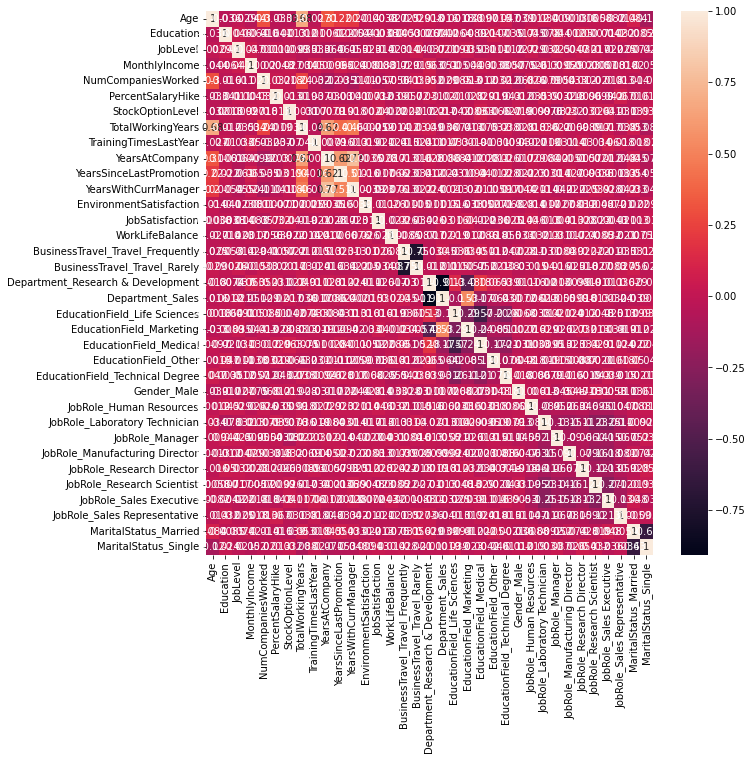

In [81]:
plt.figure(figsize = (10, 10))
sns.heatmap(df2.corr(), annot = True)

Out of curiosity, I'm going to run the same model with a significantly more aggressive alpha value to see if there are any improvements in the R2 scores. 

In [82]:
## change alpha to 10
ridge3 = Ridge(alpha=10)
ridge3.fit(X_train, y_train)

Ridge(alpha=10)

In [83]:
## evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge3.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge3.score(X_test, y_test)))

R-squared score (training):0.153
R-squared score (test): 0.090


Despite increasing the magnitude by 10, there is a minor decrease to the reported R2 scores. My understanding of working with Ridge Regression is that I could better finetune my model by finding an ideal lambda. My next steps are to work on scaling my predictors before re-applying the model. 

## Final Milestone Adjustments
### 11-17-22

Part of my feedback was lack of clarity for my goal, and I want to refelct on whether or not I've misunderstood the best approach for my project. When I was approaching the initial question, I was focusing on the categorical data and considered a regression model my best option, but didn't udnerstand that this approach was for continuous fields. Within that nuance between the two, I thought there was more gray in that regression modeling could predict distinct fields if they were transformed to an integer (in my case 1/0). With the feedback provided and my abysmal scores, I've shifted my approach to a classification model. 


In [16]:
from sklearn.ensemble import RandomForestClassifier

## classification model
rf_clf = RandomForestClassifier(n_estimators = 40, random_state = 42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, accuracy_score

## evaulate classification model
print(classification_report(y_test,pred ))
print(accuracy_score(y_test, pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       0.98      0.98      0.98       141

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882

0.9931972789115646


With optimistic caution, the classification model returned ~99% accuracy on our trained model of the test set. With no adjustments needed, the next step is to look at what categorical features had the most impact on attrition.

<AxesSubplot:>

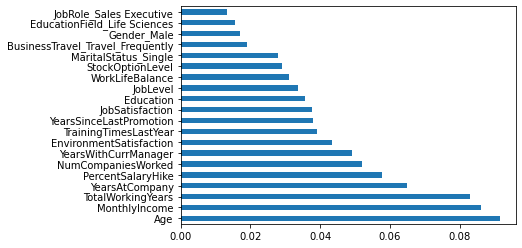

In [21]:
## evaluate fields
important_features = pd.Series(rf_clf.feature_importances_, index=X.columns)
important_features.nlargest(20).plot(kind='barh')

Looking at the above visual, age would be the highest indicator, followed shortly by monthly income and total years spent working with the company. Subjectively, these are not surprising results. However, it does raise additional questions, such as what type of attrition is this company facing? If age is a large indicator of attrition, is this retirement/is this an anticipated level of attrition considering an employee's laboring years? Alternatively, are employees of different ages more likely to be passed up for promotions/salary increases? 

<AxesSubplot:xlabel='Age'>

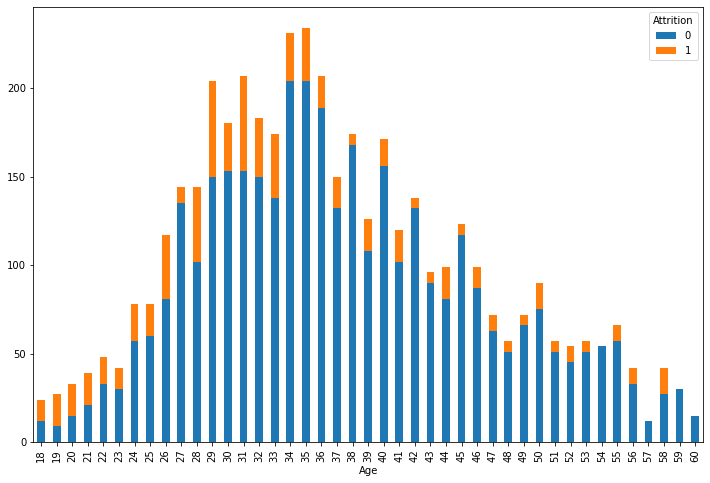

In [22]:
df2.groupby(['Age', 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))

Evaluating the fire above, it seems age is actually more concentrated in younger workers, so my initial questions don't hold the same weight. There are many additional questions to evaluate within the employee data that can help a company better understand their attrition rates. Next steps would be to more closely evaluate the top categorical fields that influence attrition. 